In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance_df = pd.read_csv("insurance.csv")

In [3]:
insurance_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
insurance_df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

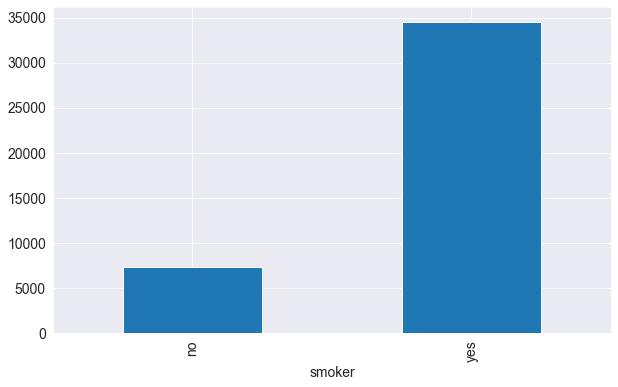

In [9]:
insurance_df.groupby("smoker")['expenses'].median().plot.bar()
plt.show()

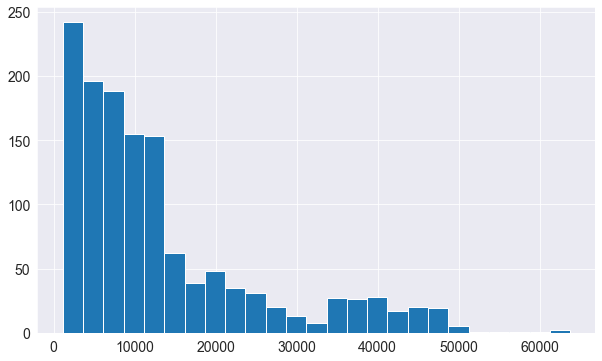

In [10]:
insurance_df['expenses'].hist(bins=25)
plt.show()

In [11]:
insurance_df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

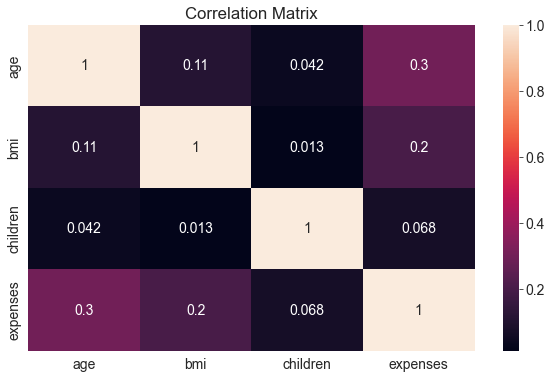

In [12]:
sns.heatmap(insurance_df.corr(), annot=True)
plt.title('Correlation Matrix')

In [13]:
insurance_df.expenses.corr(insurance_df.age)

0.29900819228508263

In [14]:
insurance_df.expenses.corr(insurance_df.bmi)

0.19857625501893197

In [15]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = insurance_df.smoker.map(smoker_values)
insurance_df.expenses.corr(smoker_numeric)

0.7872514298985548

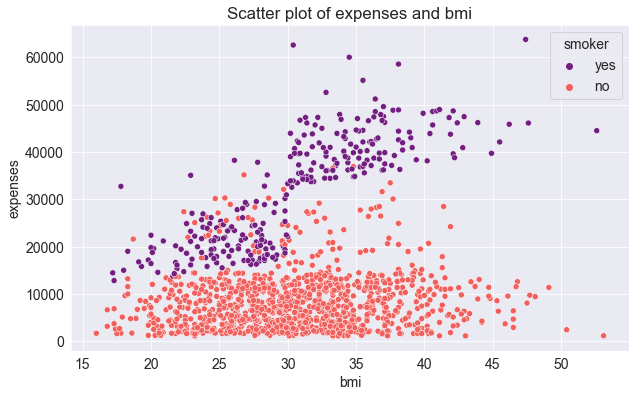

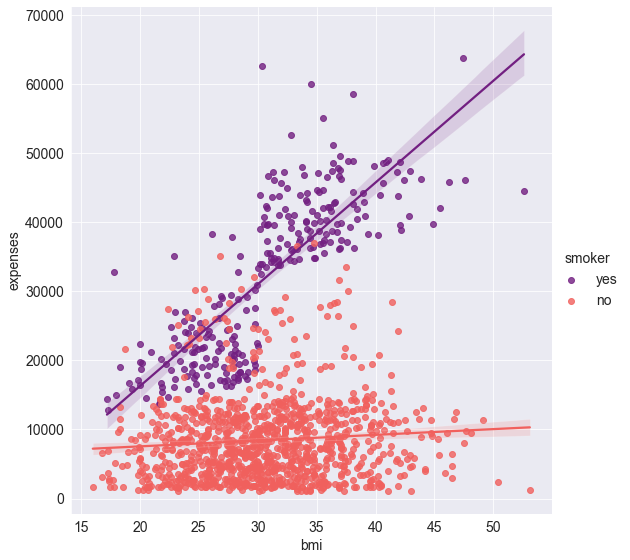

In [16]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='expenses',data=insurance_df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of expenses and bmi')
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=insurance_df, palette = 'magma', size = 8)

<AxesSubplot:xlabel='age', ylabel='expenses'>

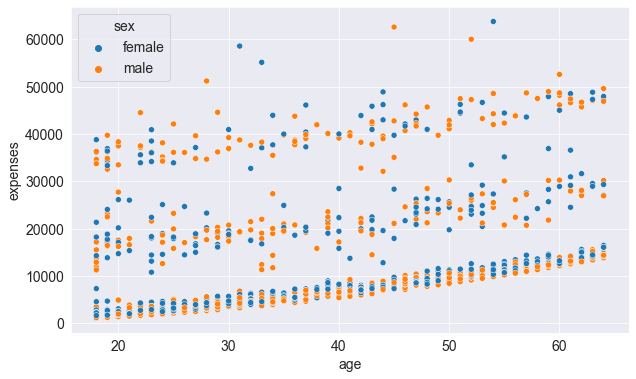

In [17]:
sns.scatterplot("age","expenses",hue='sex',data=insurance_df)

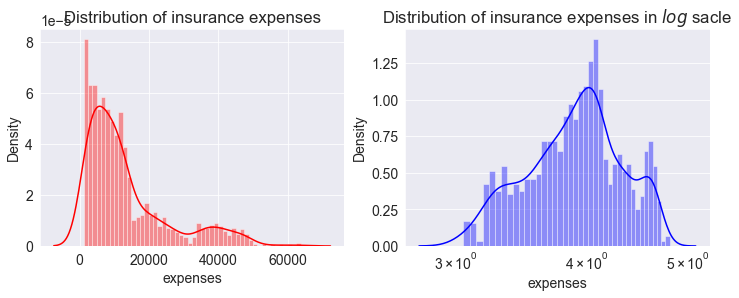

In [18]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(insurance_df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance expenses')

ax=f.add_subplot(122)
sns.distplot(np.log10(insurance_df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance expenses in $log$ sacle')
ax.set_xscale('log');


In [19]:
X = insurance_df.drop(['expenses'], axis=1)
y = insurance_df['expenses']

In [20]:
X.to_csv('clean_data.csv')

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_features = ['age', 'bmi', 'children']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_features = ['sex', 'smoker','region']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [23]:
print(X_train.shape, y_test.shape)

(936, 6) (402,)


In [24]:
cat_feat = ['sex', 'children', 'smoker', 'region']
num_feat = ['age','bmi']

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
random_forest_reg = Pipeline(steps=[('preprocessor', preprocessor),('random_forest_regressor', RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42))])
knn = Pipeline(steps=[('preprocessor', preprocessor),('knn', KNeighborsRegressor(n_neighbors=10))])
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),('gradient_boosting' , GradientBoostingRegressor())])


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))
print("Linear Regression Test Accuracy:{}".format(linear_reg.score(X_test,y_test)))

The Mean Squared Error using Linear Regression :35708418.69390985
The Root Mean Squared Error using Linear Regression :5975.652156368362
The r2_score using Linear Regression :0.7098820508606024
Linear Regression Test Accuracy:0.7098820508606024


In [28]:
score = []
for i in range(1000):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=i)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(r2_score(y_test, y_pred))

In [29]:
np.argmax(score)

367

In [30]:
score[np.argmax(score)]

0.8330631587714108

In [31]:
decision_tree.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))
print("Decision Tree Regression Test Accuracy:{}".format(decision_tree.score(X_test,y_test)))

The Mean Squared Error using Decision Tree Regressor : 36656896.05543218
The Root Mean Squared Error using Decision Tree Regressor : 4867.310276315358
The r2_score using Decision Tree Regressor : 0.8387892658296556
Decision Tree Regression Test Accuracy:0.8387892658296556


In [32]:
random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))
print("Random Forest Regression Test Accuracy:{}".format(random_forest_reg.score(X_test,y_test)))

The Mean Squared Error using Random Forest Regressor : 22326826.034284692
The Root Mean Squared Error using Random Forest Regressor : 4725.127091865857
The r2_score Error using Random Forest Regressor : 0.8480702300989443
Random Forest Regression Test Accuracy:0.8480702300989443


In [33]:
gradient_boosting_reg.fit(X_train, y_train)
# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)
# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))
print("Gradient Boosting Regression Test Accuracy:{}".format(gradient_boosting_reg.score(X_test,y_test)))

The Mean Squared Error using Gradient Boosting Regressor : 22681199.267713025
The Root Mean Squared Error using Gradient Boosting Regressor : 4762.478269526594
The r2_sccore using Gradient Boosting Regressor : 0.8456587881980138
Gradient Boosting Regression Test Accuracy:0.8456587881980138


In [34]:
knn.fit(X_train, y_train)

# Predictiong The model
y_pred4 = knn.predict(X_test)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print("The mean squared error using KNN is {}".format(knn_mse))
print("The root mean squared error using KNN is {}".format(knn_rmse))
print("The r2_score using KNN is {}".format(knn_r2_score))

The mean squared error using KNN is 33391301.45668455
The root mean squared error using KNN is 5778.520697954153
The r2_score using KNN is 0.7727785965089417


In [35]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','KNN','Gradient Boosting'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse, knn_rmse,gradient_boosting_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, knn_r2_score,gradient_boosting_r2_score],
    'accuracy' : [linear_reg.score(X_test,y_test), decision_tree.score(X_test,y_test), random_forest_reg.score(X_test,y_test), knn.score(X_test,y_test),gradient_boosting_reg.score(X_test,y_test)]
})
models.sort_values(by='r2_score', ascending=False)

,Model,RMSE,r2_score,accuracy
2,Random Forest,4725.127092,0.848070,0.848070
4,Gradient Boosting,4762.478270,0.845659,0.845659
1,Decision Tree,4867.310276,0.838789,0.838789
3,KNN,5778.520698,0.772779,0.772779
0,Linear Regression,5975.652156,0.709882,0.749427


In [36]:
import pickle
pickle.dump(random_forest_reg, open('best_regressor_model.pkl', 'wb'))